<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descriptive-vs-Inferential-Statistics" data-toc-modified-id="Descriptive-vs-Inferential-Statistics-1">Descriptive vs Inferential Statistics</a></span></li><li><span><a href="#Data-Types-for-Data-Science" data-toc-modified-id="Data-Types-for-Data-Science-2">Data Types for Data Science</a></span></li><li><span><a href="#Measures-of-Central-Tendency-(1st-Business-Moment)" data-toc-modified-id="Measures-of-Central-Tendency-(1st-Business-Moment)-3">Measures of Central Tendency (1st Business Moment)</a></span></li><li><span><a href="#Measures-of-Dispersion-(2nd-Business-Moment)" data-toc-modified-id="Measures-of-Dispersion-(2nd-Business-Moment)-4">Measures of Dispersion (2nd Business Moment)</a></span></li><li><span><a href="#Plots-for-summarizing-Discrete-vs-Continuous-data" data-toc-modified-id="Plots-for-summarizing-Discrete-vs-Continuous-data-5">Plots for summarizing Discrete vs Continuous data</a></span></li><li><span><a href="#Correlation-analysis" data-toc-modified-id="Correlation-analysis-6">Correlation analysis</a></span></li><li><span><a href="#Bivariate/Multivariate-Analysis" data-toc-modified-id="Bivariate/Multivariate-Analysis-7">Bivariate/Multivariate Analysis</a></span></li></ul></div>

## Descriptive vs Inferential Statistics

<b>Descriptive statistics</b>: Summarizing characteristics of a given dataset using various measures like measures of central tendency and measure of dispersion

<b>Inferential statistics</b>: Taking a sample of data to make generalizations about the population. (E.g. Hypothesis testing)

## Data Types for Data Science

Data types in general can be classified into the following:

<b>1. Discrete Data: Data that is either countable (only takes integer values) or finite (specified list of values)</b>
- <b>Count</b>: Numerical data that is countable on integer values only
- <b>Category</b>: Categorical data with labels

Categorical data can be further split into two types:
- <b>Binary class</b>: Categorical data with 2 labels
- <b>Multiple class</b>: Categorical data with more than 2 labels
- &nbsp;&nbsp;&nbsp;&nbsp; <b>Nominal</b>: Categorical data with more than 2 labels that do not have any specified order
- &nbsp;&nbsp;&nbsp;&nbsp; <b>Ordinal</b>: Categorical data with more than 2 labels that do have specified order

<b>2. Continuous Data: Numerical data that is measurable and infinite (in the form of fractions or decimals)</b>
- <b>Interval</b>: Numerical data with order and relative magnitude (evenly-spaced) information (no true zero value - zero value has no meaning)
- <b>Ratio</b>: Numerical data with absolute scale information (with true zero value - zero value has meaning)

<b>Note that interval data types have certain restrictions on meaningful mathematical operations (addition and subtraction), unlike ratio data types that have no restrictions on mathematical operations allowed</b>

Examples of individual data types:

1. Discrete: Number of children, Count of workers, Number of pages in a book, Colour, Gender, Car brand, blood group, wealth status, class ranking

- Nominal: Colour, Gender, Car brand, Blood group

- Ordinal: Wealth status, Class ranking

- Count: Number of children, Count of workers, Number of pages in a book

2. Continuous: Age, Height, Temperature, Exam marks, Income

- Interval: Income, Temperature

- Ratio: Age, Height, Exam marks



## Measures of Central Tendency (1st Business Moment)

For numerical data, one of the main measures for data exploration is getting an estimate of where most of the data is located (central tendency).

The following are the main measures of central tendency, but not limited to the following:
1. <b>Mean</b>: Average of list of numerical values
2. <b>Median</b>: Center value from list of numerical values sorted in order
3. <b>Mode</b>: Numerical value with highest frequency

While mean is the most popular measure of central tendency, mean measure is highly sensitive to outliers, such that sometimes other alternatives might be more suitable to reduce influence of outliers.

i) <b>Trimmed mean</b>: Average of numerical values after eliminating outliers (extreme values) for a more robust measure based on threshold

ii) <b>Weighted mean</b>: Average of numerical values based on specified weights, if some values are more variable than others or groups are not equally represented.

iii) <b>Interquartile mean</b>: Average of numerical values after eliminating outliers (extreme values) for a more robust measure based on interquartile range (IQR)

iv) <b>Median</b>: Unlike mean, median only relies on values in the center of sorted data, which makes it a robust measure (<b>less sensitive to outliers</b>)

Drawbacks of various measures of central tendency:
1. <b>Mean</b>: Highly sensitive to outliers
2. <b>Median</b>: Even number of observations result in non-existent values
3. <b>Mode</b>: More than 1 mode exist for more than 1 value with highest frequency.

Note that median and mode do not depend on all observations, which is another drawback.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as spy
import matplotlib.pyplot as plt
from dython.nominal import associations
import pandas as pd

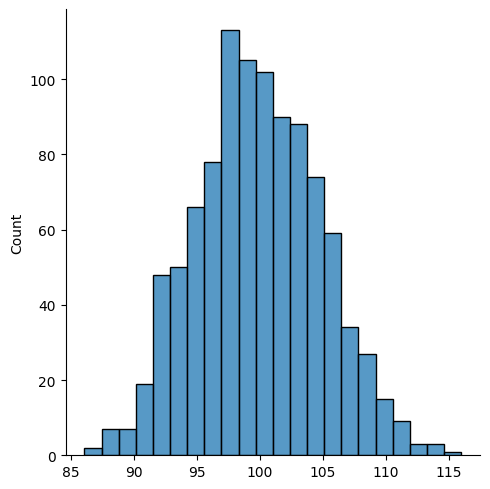

Mean of sample: 99.90983293847127
Median of sample: 99.74875388516506
Trimmed mean of sample (10% removal): 99.86335060355701


In [2]:
sample = np.random.normal(loc=100, scale=5, size=1000)
sns.displot(sample)
plt.show()
print("Mean of sample:",np.mean(sample))
print("Median of sample:",np.median(sample))
print("Trimmed mean of sample (10% removal):",spy.trim_mean(sample,0.1))

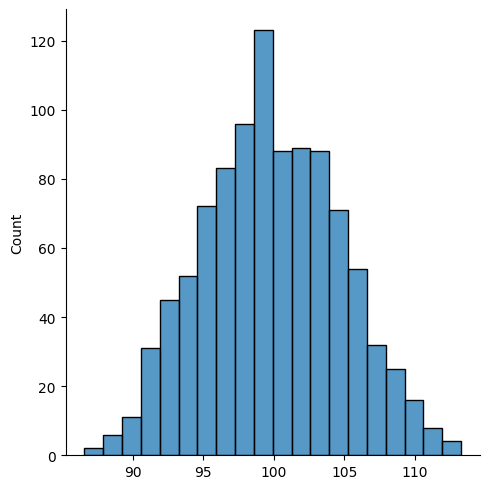

Interquartile mean of sample with no outliers: 99.87901151603634
Median of sample with no outliers: 99.74552035805979


In [3]:
# Removing outliers using IQR
IQR = np.percentile(sample,75) - np.percentile(sample,25)
bottom_outlier = np.percentile(sample,25) - 1.5 * IQR
top_outlier = np.percentile(sample,75) + 1.5 * IQR
sample_nooutlier = sample[(sample>=bottom_outlier) & (sample<=top_outlier)]
sns.displot(sample_nooutlier)
plt.show()
print("Interquartile mean of sample with no outliers:",np.mean(sample_nooutlier))
print("Median of sample with no outliers:",np.median(sample_nooutlier))

In [4]:
print("Difference between mean of sample with vs without outliers:",np.mean(sample)-np.mean(sample_nooutlier))
print("Difference between median of sample with vs without outliers:",np.median(sample)-np.median(sample_nooutlier))

Difference between mean of sample with vs without outliers: 0.030821422434925694
Difference between median of sample with vs without outliers: 0.003233527105265921


From the difference of values above between sample with and without outliers, median is a lot less sensitive to outliers with a much smaller difference, compared to mean.

## Measures of Dispersion (2nd Business Moment)

Besides measure of central tendency, another useful measure for summarizing features is dispersion, which measures whether the data values are tightly clustered or spread out. Variability in features is at the heart of Machine Learning, where variability in features is essential for predictive analytics.

Deviations represent the difference between observed values and the estimate of location.

The following are the main measures of dispersion:

1. <b>Variance</b>: Sum of squared deviations from the mean divided by "sample size - 1"

2. <b>Standard Deviation</b>: Square root of variance

3. <b>Mean absolute deviation</b>: Average of absolute values of deviations from the mean

4. <b>Median absolute deviation</b>: Median of absolute values of deviations from the median

5. <b>Range</b>: Difference between largest and smallest value of dataset

6. <b>Interquartile Range</b>: Difference between 75th and 25th percentile

Standard deviation is usually easier to interpret, compared to variance since standard deviation measure is on the same scale as the original data.

<b>Note that variance, standard deviation and range are highly sensitive to outliers. More robust measures of dispersion are mean absolute deviation, median absolute deviation and interquartile range.</b>

Sometimes, median absolute deviation is multiplied by constant scale factor depending on the distribution type for consistent scale with standard deviation measure. More details about this can be found on the following link: https://en.wikipedia.org/wiki/Median_absolute_deviation

In [5]:
print("Variance of sample:",np.var(sample))
print("Standard deviation of sample:",np.std(sample))
print("Mean absolute deviation of sample:",np.mean(np.absolute(sample - np.mean(sample))))
print("Median absolute deviation of sample:",spy.median_abs_deviation(sample,scale='normal'))
print("Range of sample:",np.max(sample)-np.min(sample))
print("Interquartile range of sample:",spy.iqr(sample))

Variance of sample: 24.218399333834768
Standard deviation of sample: 4.9212192934104015
Mean absolute deviation of sample: 3.9735336059403825
Median absolute deviation of sample: 5.03807925808399
Range of sample: 29.888014371900468
Interquartile range of sample: 6.844760929217529


In [6]:
print("Variance of sample with no outliers:",np.var(sample_nooutlier))
print("Standard deviation of sample with no outliers:",np.std(sample_nooutlier))
print("Mean absolute deviation of sample with no outliers:",np.mean(np.absolute(sample_nooutlier - np.mean(sample_nooutlier))))
print("Median absolute deviation of sample with no outliers:",spy.median_abs_deviation(sample_nooutlier,scale='normal'))
print("Range of sample with no outliers:",np.max(sample_nooutlier)-np.min(sample_nooutlier))
print("Interquartile range of sample with no outliers:",spy.iqr(sample_nooutlier))

Variance of sample with no outliers: 23.457790626078793
Standard deviation of sample with no outliers: 4.843324336246623
Mean absolute deviation of sample with no outliers: 3.9300555371249732
Median absolute deviation of sample with no outliers: 5.003770361096057
Range of sample with no outliers: 26.692796700589554
Interquartile range of sample with no outliers: 6.7703841954418635


In [7]:
print("Difference of variance between sample with and without outliers:",np.var(sample)-np.var(sample_nooutlier))
print("Difference of st.deviation between sample with and without outliers:",np.std(sample)-np.std(sample_nooutlier))
print("Difference of mean abs.dev. between sample with and without outliers:", np.mean(np.absolute(sample - np.mean(sample))) - np.mean(np.absolute(sample_nooutlier - np.mean(sample_nooutlier))))
print("Difference of median abs.dev. between sample with and without outliers:",spy.median_abs_deviation(sample,scale='normal') - spy.median_abs_deviation(sample_nooutlier,scale='normal'))
print("Difference of range between sample with and without outliers:", (np.max(sample)-np.min(sample)) - (np.max(sample_nooutlier)-np.min(sample_nooutlier)))
print("Difference of IQR between sample with and without outliers:",spy.iqr(sample)-spy.iqr(sample_nooutlier))

Difference of variance between sample with and without outliers: 0.7606087077559742
Difference of st.deviation between sample with and without outliers: 0.07789495716377814
Difference of mean abs.dev. between sample with and without outliers: 0.043478068815409276
Difference of median abs.dev. between sample with and without outliers: 0.034308896987933046
Difference of range between sample with and without outliers: 3.195217671310914
Difference of IQR between sample with and without outliers: 0.07437673377566512


From the difference of values above between sample with and without outliers, the following measures are in order from most to least sensitive of outliers:

1. Range
2. Variance
3. Stadard Deviation
4. Mean absolute deviation
5. Interquartile Range
6. Median absolute deviation

## Plots for summarizing Discrete vs Continuous data

The following plots below are suitable for summarizing distribution of continuous data:

1. Boxplot/Violinplot/Boxenplot
2. Histogram
3. Kernel Density Estimate (KDE)

The following plots below are suitable for summarizing proportions of discrete data:

1. Barplot/Countplot
2. Pie chart

In [8]:
data = pd.read_csv('F:\Data Science Notes\Statistics\datasets\Indian_cities.csv')
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

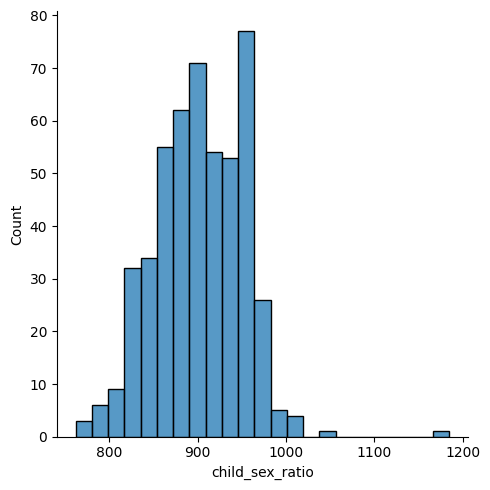

In [9]:
# Histogram plot
sns.displot(x='child_sex_ratio',data = data, kind='hist')
plt.show()

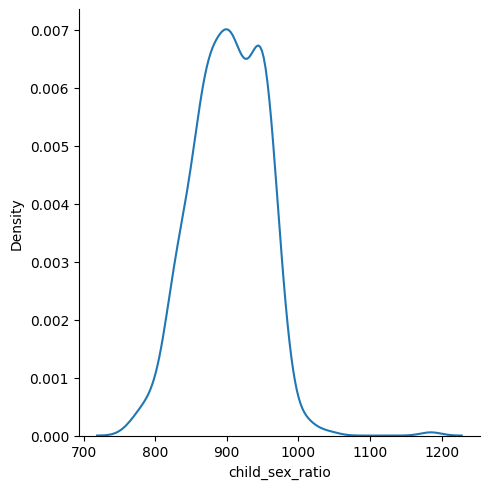

In [10]:
# KDE plot
sns.displot(x='child_sex_ratio',data = data, kind='kde')
plt.show()

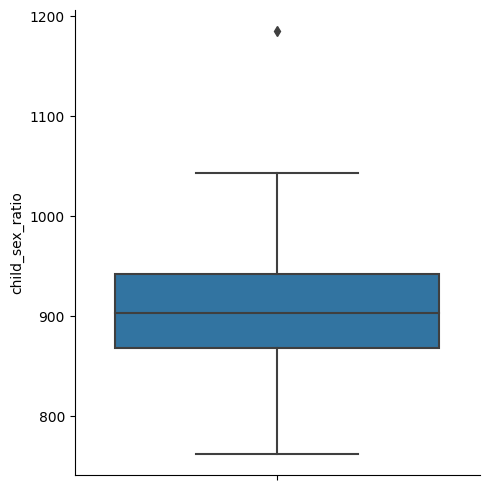

In [11]:
# Box plot
sns.catplot(y='child_sex_ratio',data = data, kind='box')
plt.show()

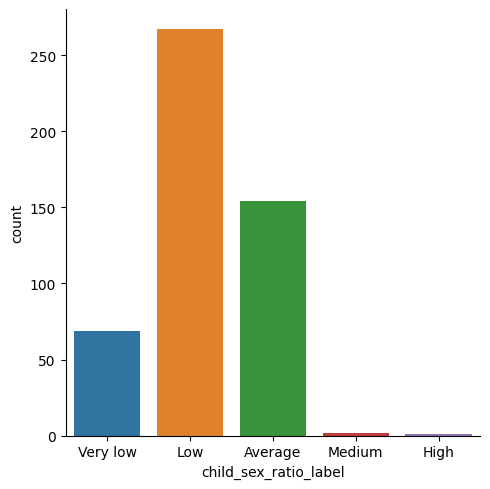

In [12]:
data['child_sex_ratio_label'] = pd.cut(data['child_sex_ratio'], bins=5,labels = ['Very low', 'Low', 'Average', 'Medium', 'High'])
# Bar (count) plot
sns.catplot(x='child_sex_ratio_label', data = data, kind='count')
plt.show()

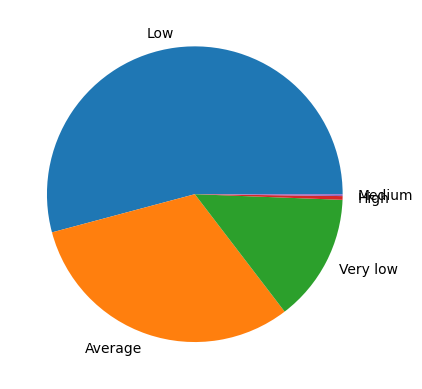

In [13]:
# Pie chart
plt.pie(data['child_sex_ratio_label'].value_counts(),labels=data['child_sex_ratio_label'].unique())
plt.show()

## Correlation analysis

Identifying relationships between different numerical variables is part of exploratory data analysis. 

For deriving correlation measure, covariance measure is required, which measures the direction of linear relationships.

Formula for covariance:

<img src='https://afrozhussain.files.wordpress.com/2016/01/covariance.png' width=300, height=75>


Correlation measure helps to identify strength and direction of linear relationships between two variables or between feature and predictor, which will be useful for feature selection.

Formula for correlation: 

<img src='http://zerodha.com/varsity/wp-content/uploads/2017/03/Formula-correlation.png' width=250, height=100>

Correlation value ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation)

For performing correlation analysis, three visualization plots for smaller datasets are available:

1. Correlation heatmap 
2. Scatter plot
3. Pair plot

There are three different types of correlation measures:
1. Pearson (Most commmonly used for larger datasets - Not robust to outliers and cannot handle non-linear relationships)
2. Spearman (Most commonly used for smaller datasets - Robust to outliers and can handle non-linear relationships)
3. Kendall (Most commonly used for smaller datasets - Robust to outliers and can handle non-linear relationships)

Although Pearson correlation is the most preferred method, there are several assumptions of Pearson correlation that needs to follow:
1. Linear relationships
2. Normal distribution of data
3. Continuous variables
4. Absence of outliers

For data that does not satisfy any assumption of Pearson correlation, Spearman and Kendall method is preferred.

Note that spearman and kendall's correlation coefficients are based on data ranking, instead of its values and both methods can also accept discrete ordinal variables.

However, kendall's correlation is more robust, compared to spearman's correlation.

Rule of thumb for correlation values (absolute value terms):
- 1: Perfect correlation
- 0.8 to 1: Very strong correlation
- 0.6 to 0.8: Strong correlation
- 0.4 to 0.6: Moderate correlation
- 0.2 to 0.4: Weak correlation
- 0 to 0.2: Very weak correlation

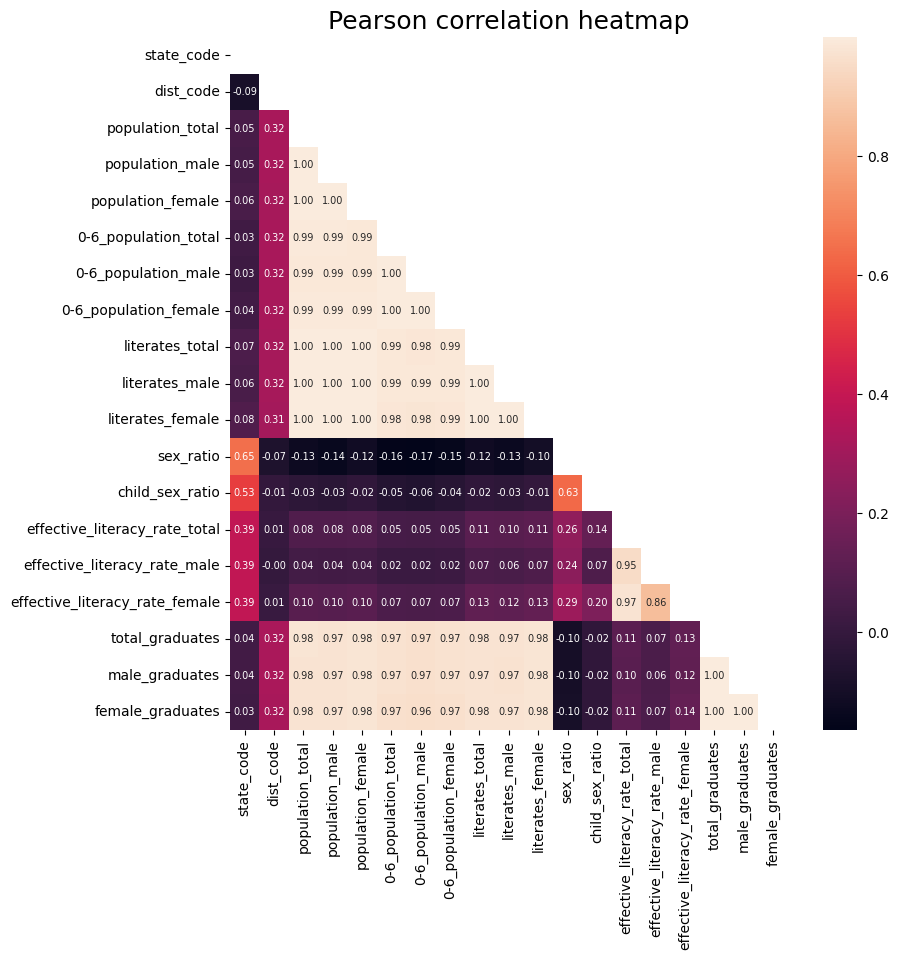

In [14]:
# Pearson correlation heatmap
correlation = data.corr(method='pearson')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Pearson correlation heatmap',size=18)
plt.show()

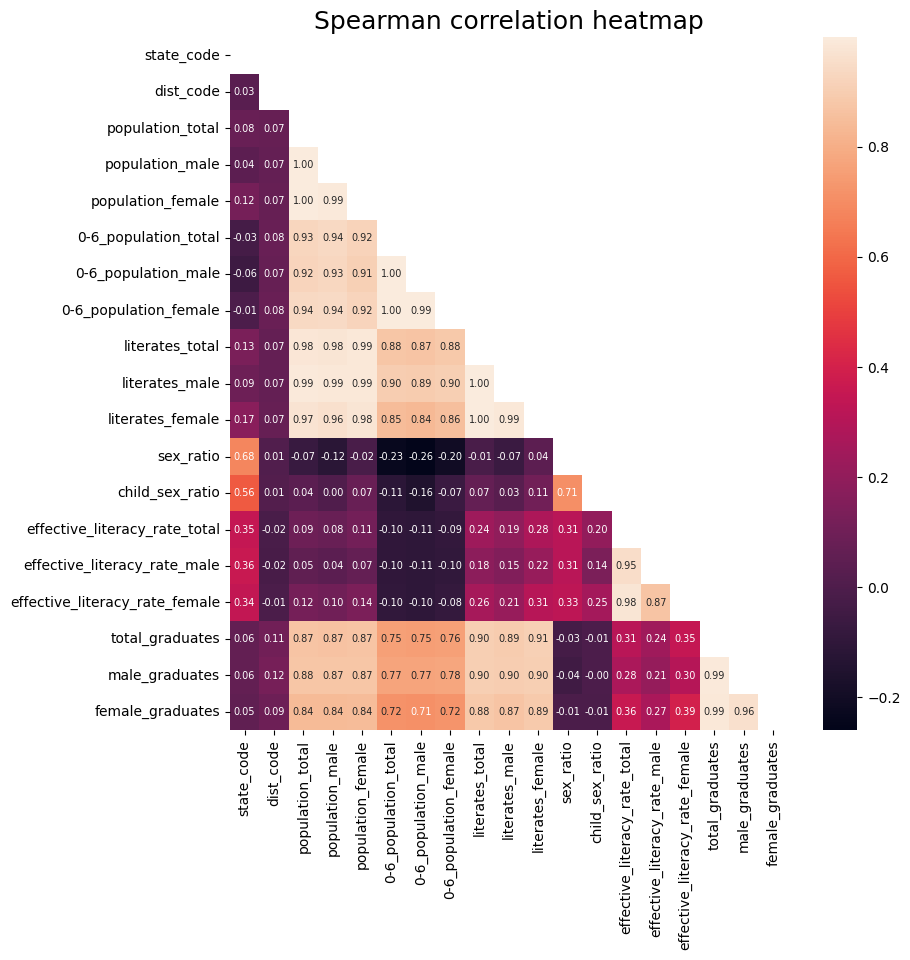

In [15]:
# Spearman correlation heatmap
correlation = data.corr(method='spearman')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Spearman correlation heatmap',size=18)
plt.show()

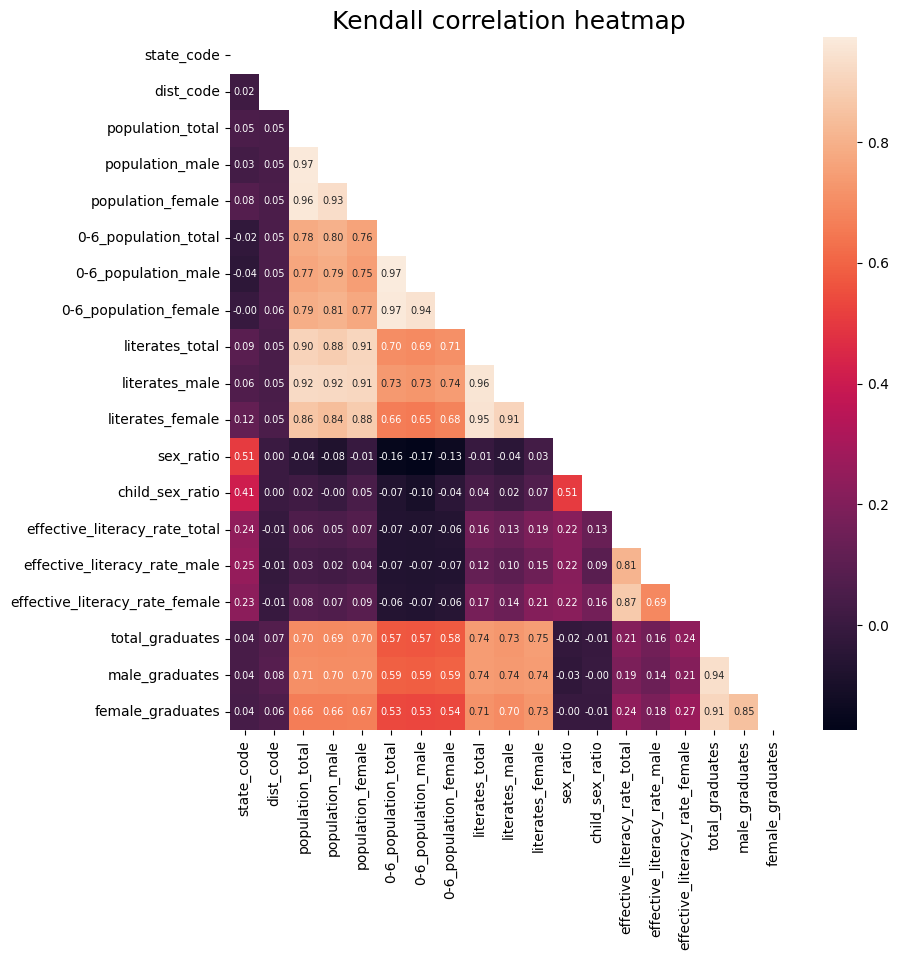

In [16]:
# Kendall correlation heatmap
correlation = data.corr(method='kendall')
plt.figure(figsize=(9,9))
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation, dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Kendall correlation heatmap',size=18)
plt.show()

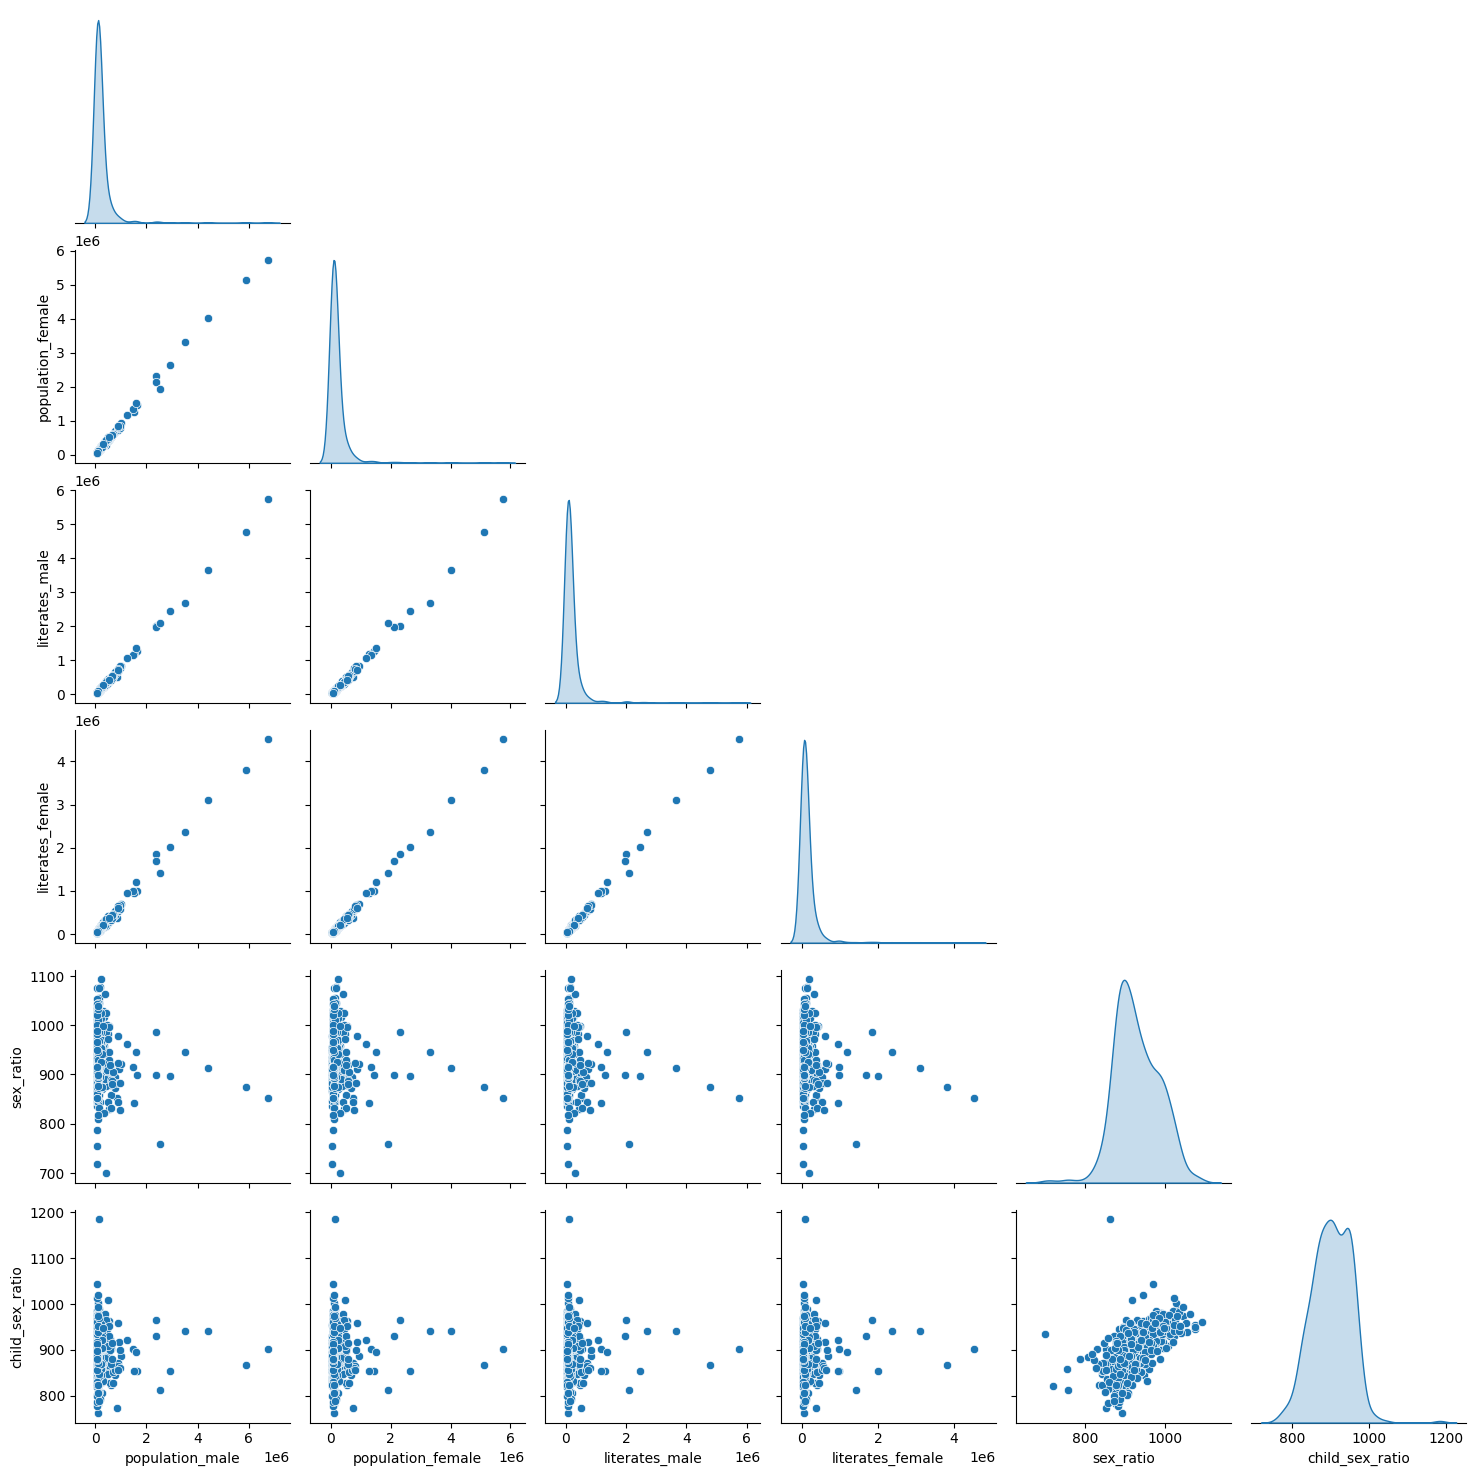

In [17]:
# Pairplot for correlation (scatterplot) and distribution (kde) analysis
subset = data.iloc[:,[5,6,11,12,13,14]]
sns.pairplot(subset, corner=True, diag_kind='kde')
plt.show()

Correlation analysis can also be extended to categorical variables by using dython library as shown in the example below:

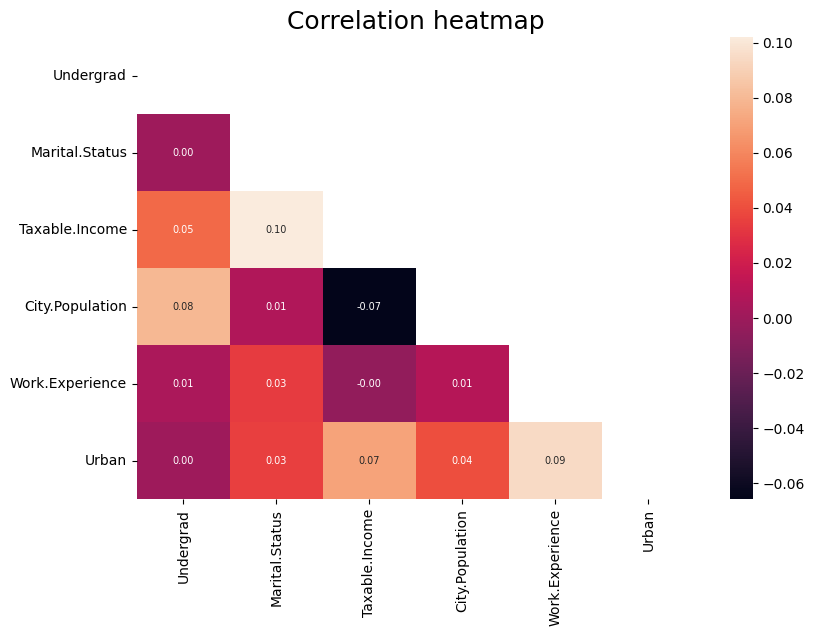

In [18]:
fraud = pd.read_csv('F:\Data Science Notes\Statistics\datasets\Fraud_check.csv')
corr = associations(fraud, nom_nom_assoc='cramer', num_num_assoc='spearman',nom_num_assoc='correlation_ratio',compute_only=True)
plt.figure(figsize=(9,6))
sns.heatmap(corr['corr'], annot=True, mask = np.triu(np.ones_like(corr['corr'], dtype=bool)),fmt='.2f',annot_kws={'fontsize':7})
plt.title('Correlation heatmap',size=18)
plt.show()

Cramer's V represents measure of association between two nominal variables, based on Pearson's chi-squared statistic.

## Bivariate/Multivariate Analysis

Bivariate/multivariate analysis involves analyzing relationship between two or more variables.

The following plots can be used for multivariate analysis:

1. Scatter plot (Between two numerical variables for smaller dataset)
2. Hexagonal plot (Between two numerical variables for larger dataset, alternative to histogram)
3. Contour plot (Between two numerical variables for larger dataset, alternative to kde)
4. Contigency table (Between two categorical variables)
5. Boxplot/Violinplot/Boxenplot (Between numerical and categorical variables)

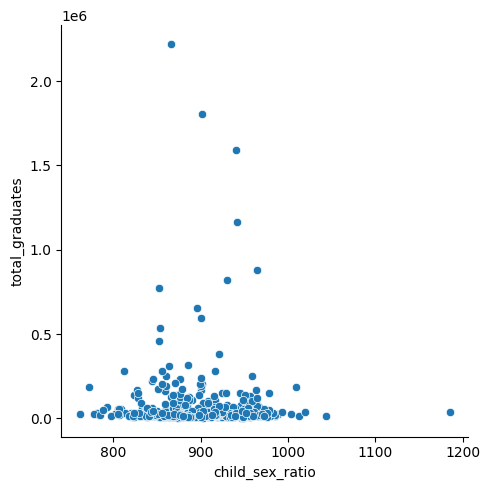

In [19]:
# Individual scatterplot
sns.relplot(x='child_sex_ratio', y='total_graduates', data=data, kind='scatter')
plt.show()

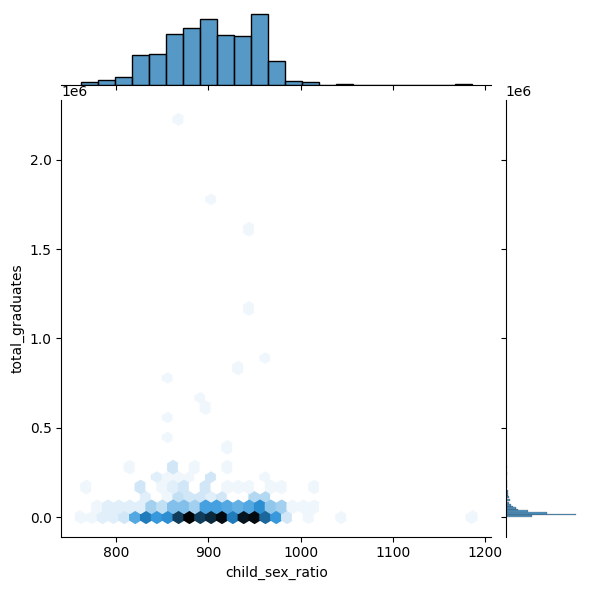

In [20]:
# Hexagonal bin plot
sns.jointplot(x='child_sex_ratio', y='total_graduates', data=data,kind='hex')
plt.show()

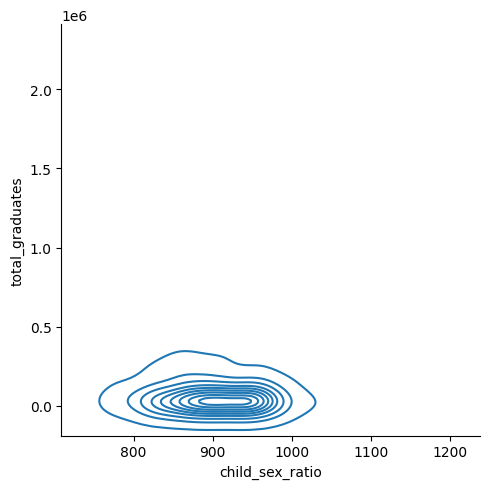

In [21]:
# Contour plot (KDE)
sns.displot(x='child_sex_ratio', y='total_graduates', data=data,kind='kde')
plt.show()

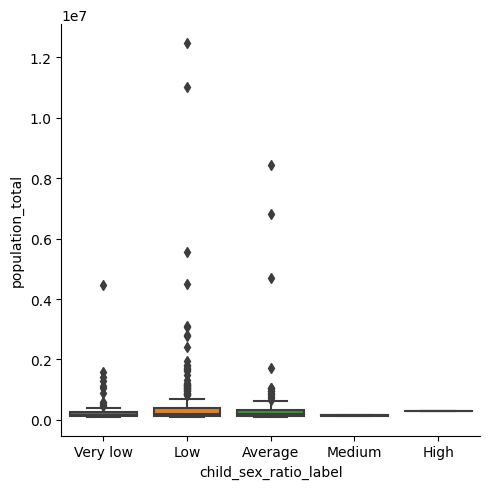

In [22]:
# Violin plot
sns.catplot(x='child_sex_ratio_label', y='population_total', data=data, kind='box')
plt.show()

In [23]:
# Contingency table
pd.crosstab(index=data['state_name'],columns=data['child_sex_ratio_label'])

child_sex_ratio_label,Very low,Low,Average,Medium,High
state_name,,,,,
ANDAMAN & NICOBAR ISLANDS,0,1,0,0,0
ANDHRA PRADESH,0,9,33,0,0
ASSAM,0,0,3,1,0
BIHAR,1,21,4,0,0
CHANDIGARH,0,1,0,0,0
CHHATTISGARH,0,6,3,0,0
GUJARAT,11,18,0,0,0
HARYANA,18,2,0,0,0
HIMACHAL PRADESH,0,1,0,0,0
